# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

### 1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
# Importando as bibliotecas:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregando o dataframe:

df = pd.read_csv('previsao_de_renda.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [58]:
# Separando apenas as variáveis quantitativas
previsao = df[['index','sexo','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]

previsao


,index,sexo,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,8682,F,1,36,3.575342,3.0,3369.24
1,12830,M,0,42,0.860274,2.0,6096.14
2,2885,M,2,31,8.065753,4.0,5658.98
3,16168,F,0,50,1.208219,2.0,7246.69
4,12438,M,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...
14995,3678,M,1,37,2.046575,3.0,1193.29
14996,3405,M,1,30,12.079452,3.0,2519.18
14997,7944,F,0,40,2.161644,2.0,1586.85
14998,16019,F,0,47,3.295890,2.0,6975.39


In [73]:
previsao.corr()

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
index,1.000000,0.039734,-0.047971,-0.034574,0.041818,-0.001740
qtd_filhos,0.039734,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.047971,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.034574,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.041818,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,-0.001740,0.009567,0.042570,0.394235,0.020977,1.000000


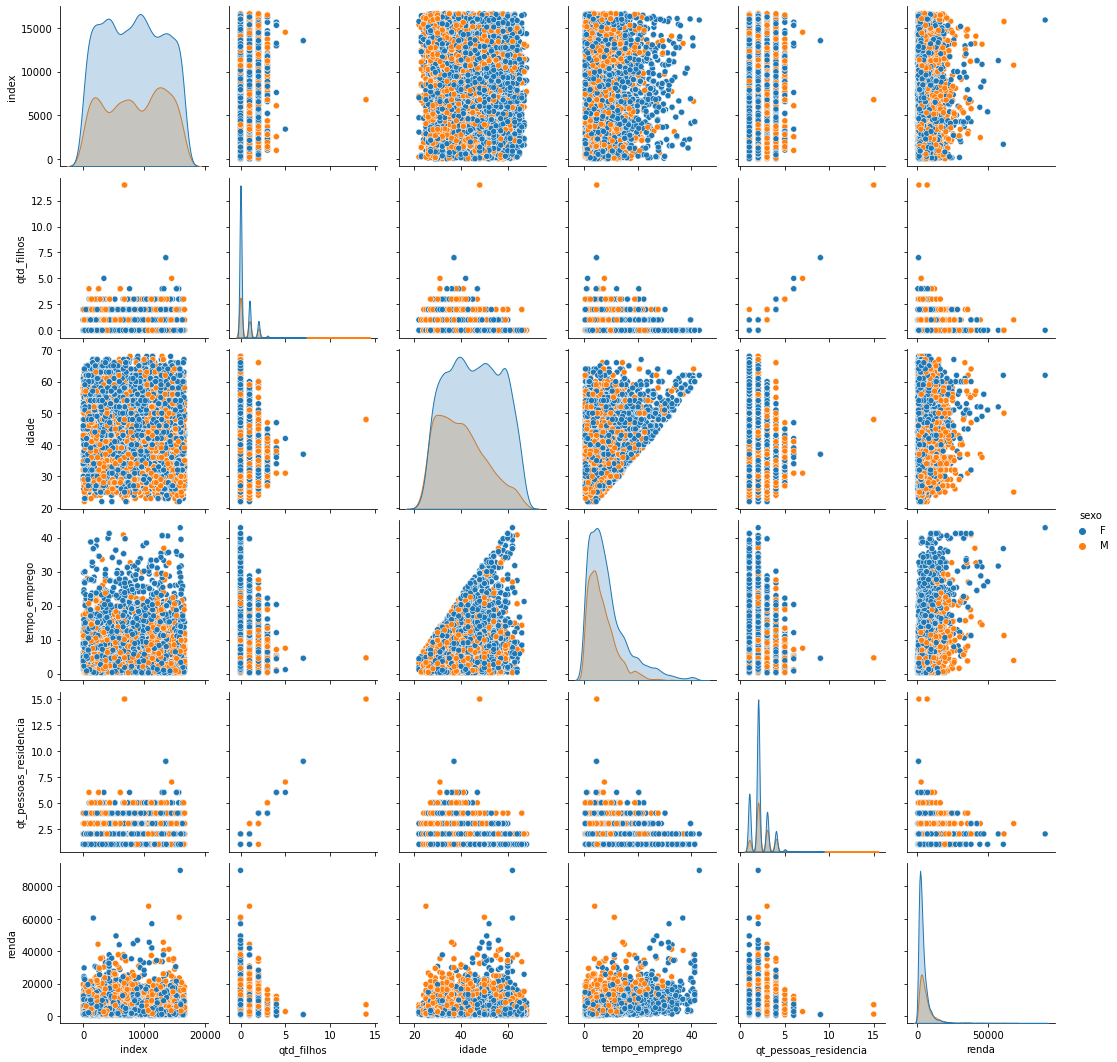

In [60]:
# Matriz de dispersão:

sns.pairplot(previsao, hue='sexo')

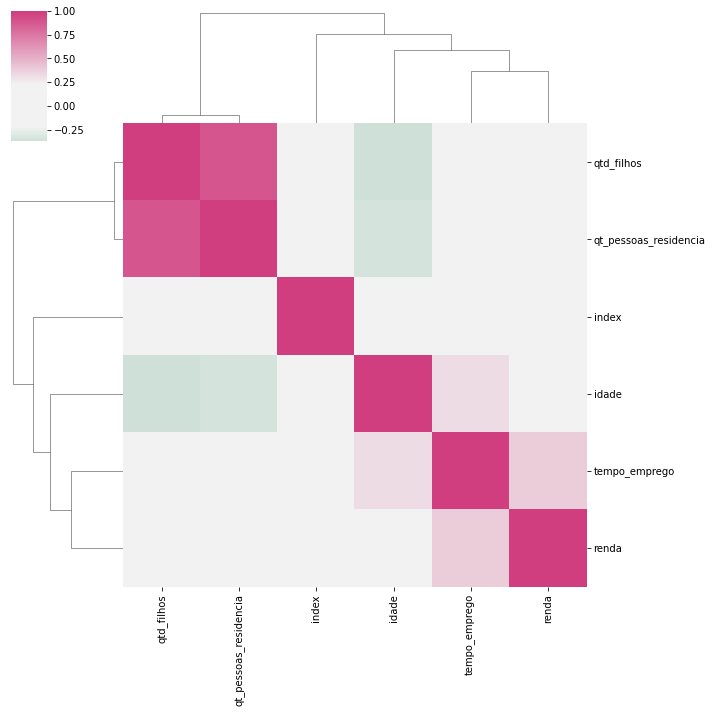

In [61]:
cmap = sns.diverging_palette(h_neg=150, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap((previsao.corr()), figsize=(10,10), center=0, cmap=cmap)

**O que é possível observar no gráfico é uma correlação óbvia entre quantidade de filhos e qauntidade de pessoas por residência; Com relação à renda, as variáveis tempo de emprego e idade apresentam correlação positiva, enquanto a de quantidade de filhos é negativa.**

### 2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='idade', ylabel='renda'>

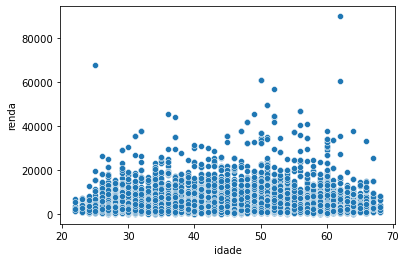

In [52]:
# De acordo com a tabela de correlação, as duas variáveis mais correlacionadas com renda são 'tempo_emprego' e 'idade'

sns.scatterplot(data=df, x="idade", y="renda")


<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

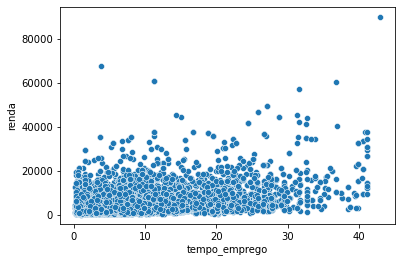

In [53]:
sns.scatterplot(data=df, x="tempo_emprego", y="renda")

### 3) Na su aopinião, há outliers na variável renda?

In [39]:
df.describe()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.00000,12466.000000,15000.000000,15000.000000
mean,7499.500000,8298.753467,0.437267,43.84140,7.750462,2.219067,4624.632946
std,4330.271354,4800.904442,0.760594,11.22917,6.780216,0.922352,4628.571729
min,0.000000,0.000000,0.000000,22.00000,0.191781,1.000000,159.900000
25%,3749.750000,4111.750000,0.000000,34.00000,3.016438,2.000000,1945.740000
50%,7499.500000,8330.500000,0.000000,43.00000,6.016438,2.000000,3278.260000
75%,11249.250000,12469.000000,1.000000,53.00000,10.183562,3.000000,5642.365000
max,14999.000000,16649.000000,14.000000,68.00000,42.906849,15.000000,89918.040000


<AxesSubplot:>

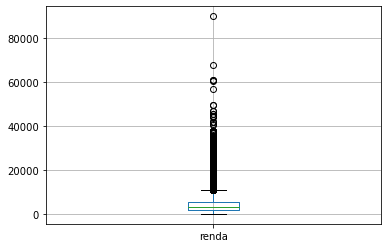

In [54]:
df[['renda']].boxplot()

**Resposta: Sim, existem outliers. Embora isso não indique um erro nos dados, pois a variável renda permite valores altos, os poucos pontos de valor muito elevado prejudicam a visualização dos outros dados**




### 4) Calcule o logaritmo da variável renda e repita a sequência de análise

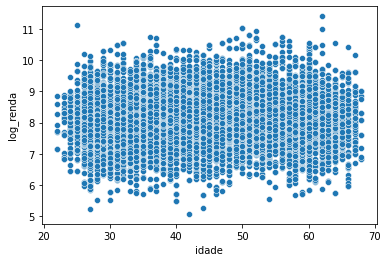

In [67]:
previsao_log = previsao.copy()
previsao_log['log_renda'] = np.log(previsao_log['renda'])

_ = sns.scatterplot(data=previsao_log, x="idade", y="log_renda")


<AxesSubplot:xlabel='tempo_emprego', ylabel='log_renda'>

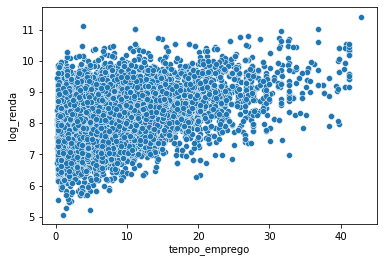

In [68]:
sns.scatterplot(data=previsao_log, x="tempo_emprego", y="log_renda")

In [72]:
previsao_log.corr()

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
index,1.000000,0.039734,-0.047971,-0.034574,0.041818,-0.001740,0.002993
qtd_filhos,0.039734,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.047971,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.034574,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.041818,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,-0.001740,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.002993,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


### 5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Acho que melhorou, pelo menos a visualização da correlação positiva entre renda e tempo de emprego, que é a mais alta, ficou mais óbvia. Para idade a correlação era pequena, então não teve muita alteração na visualização.